In [1]:
from config_simulation import (
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
    eval_covtype,
    n,
    N,
    nu_list,
    gamma_list,
)
from optimization_algorithms import UWASNA


optimizer_class = UWASNA
optimizer_list = [optimizer_class(gamma=gamma) for gamma in gamma_list]

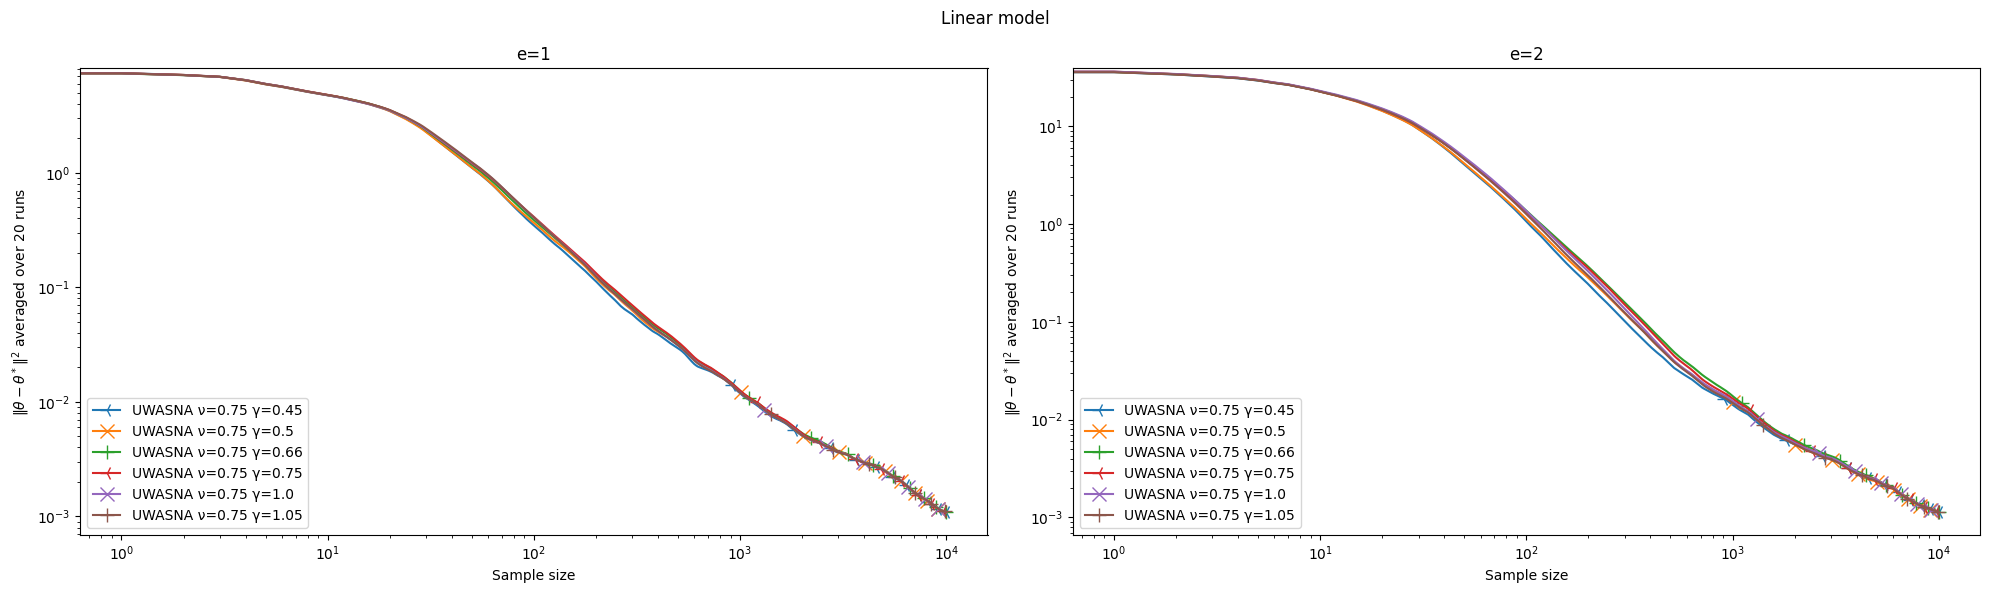

In [2]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

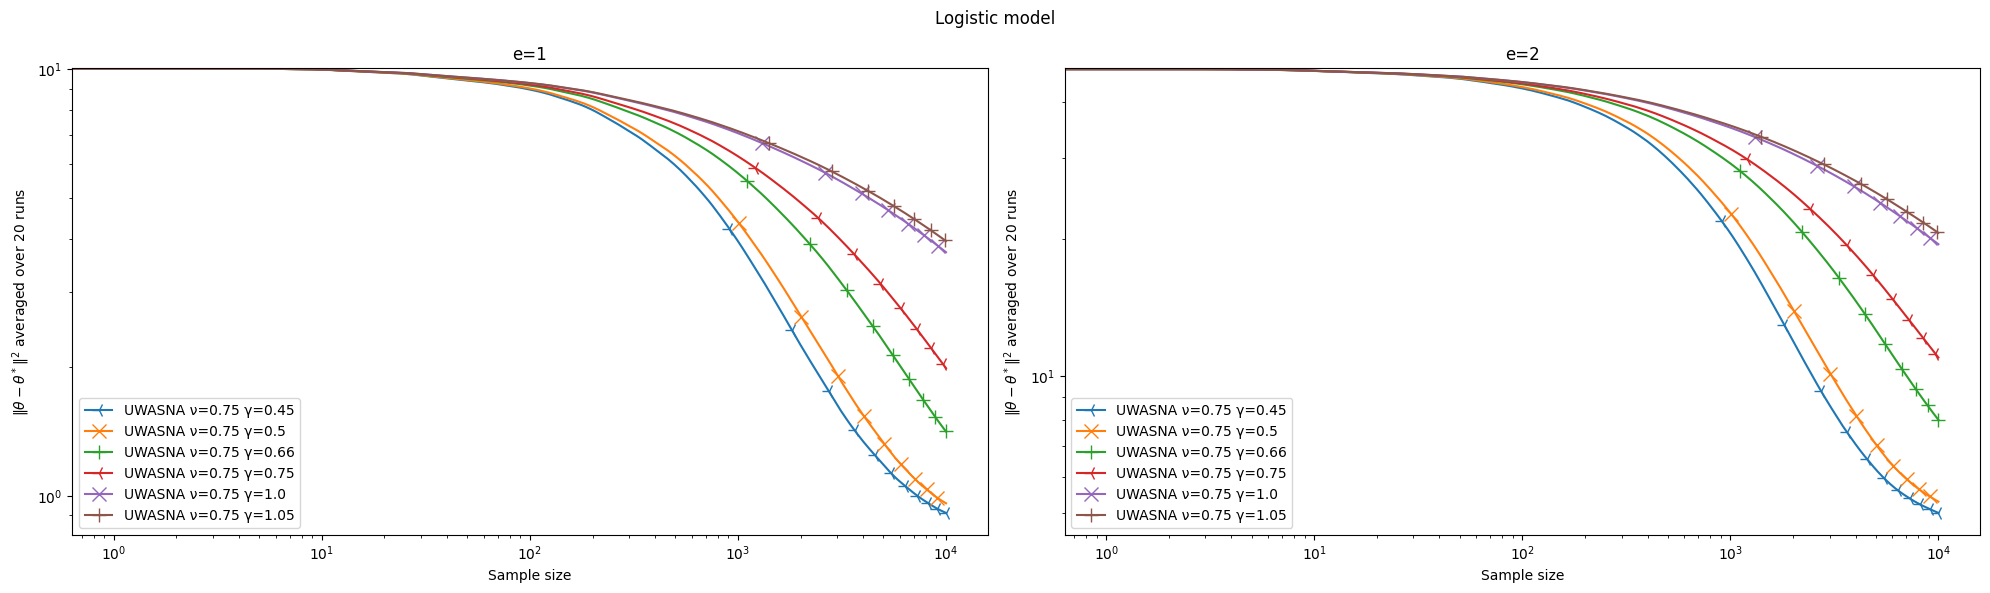

In [3]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

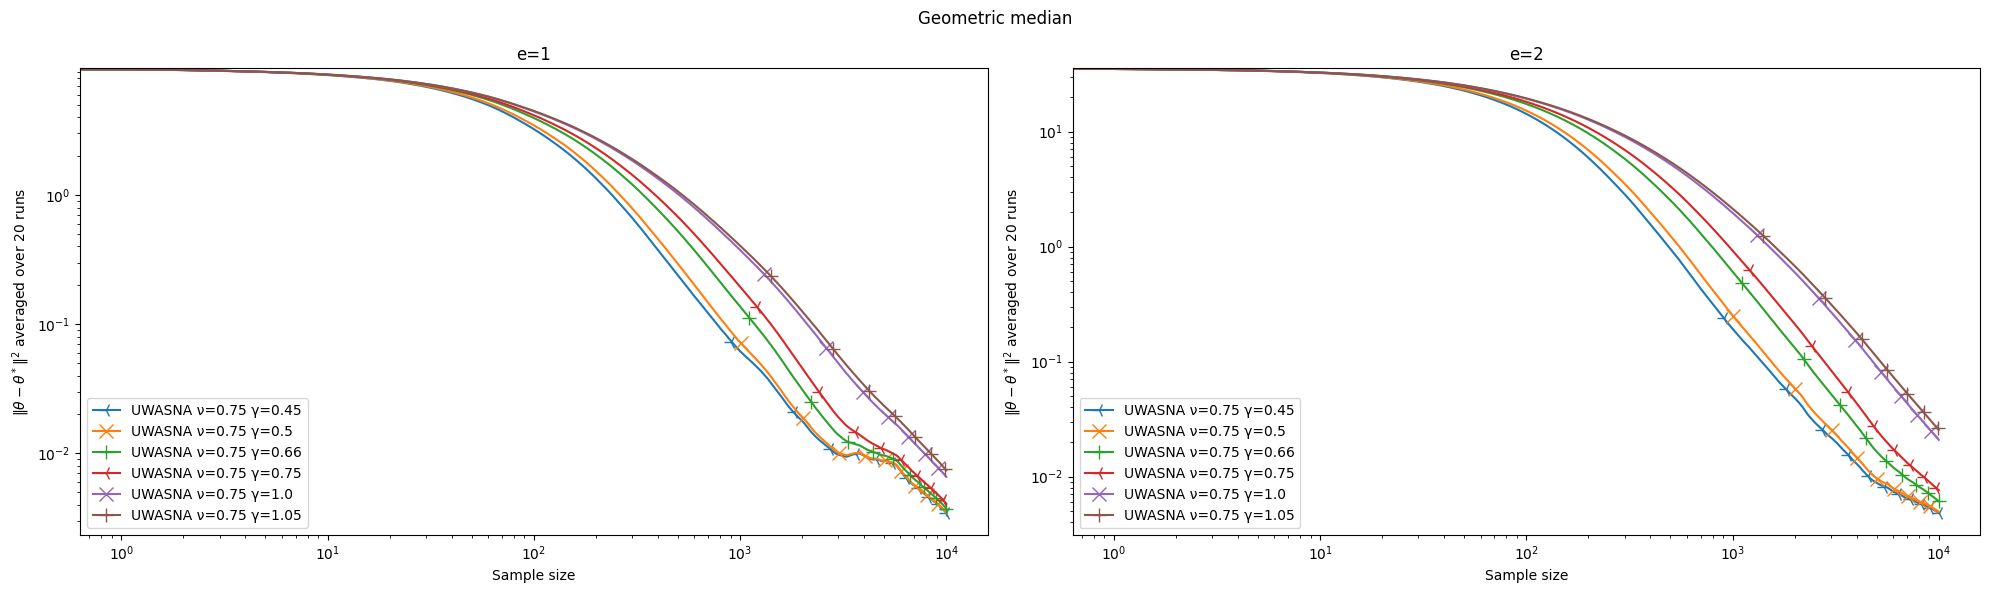

In [4]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

/users/Etu8/17009018/venv/myenv/lib/python3.11/site-packages/matplotlib/scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


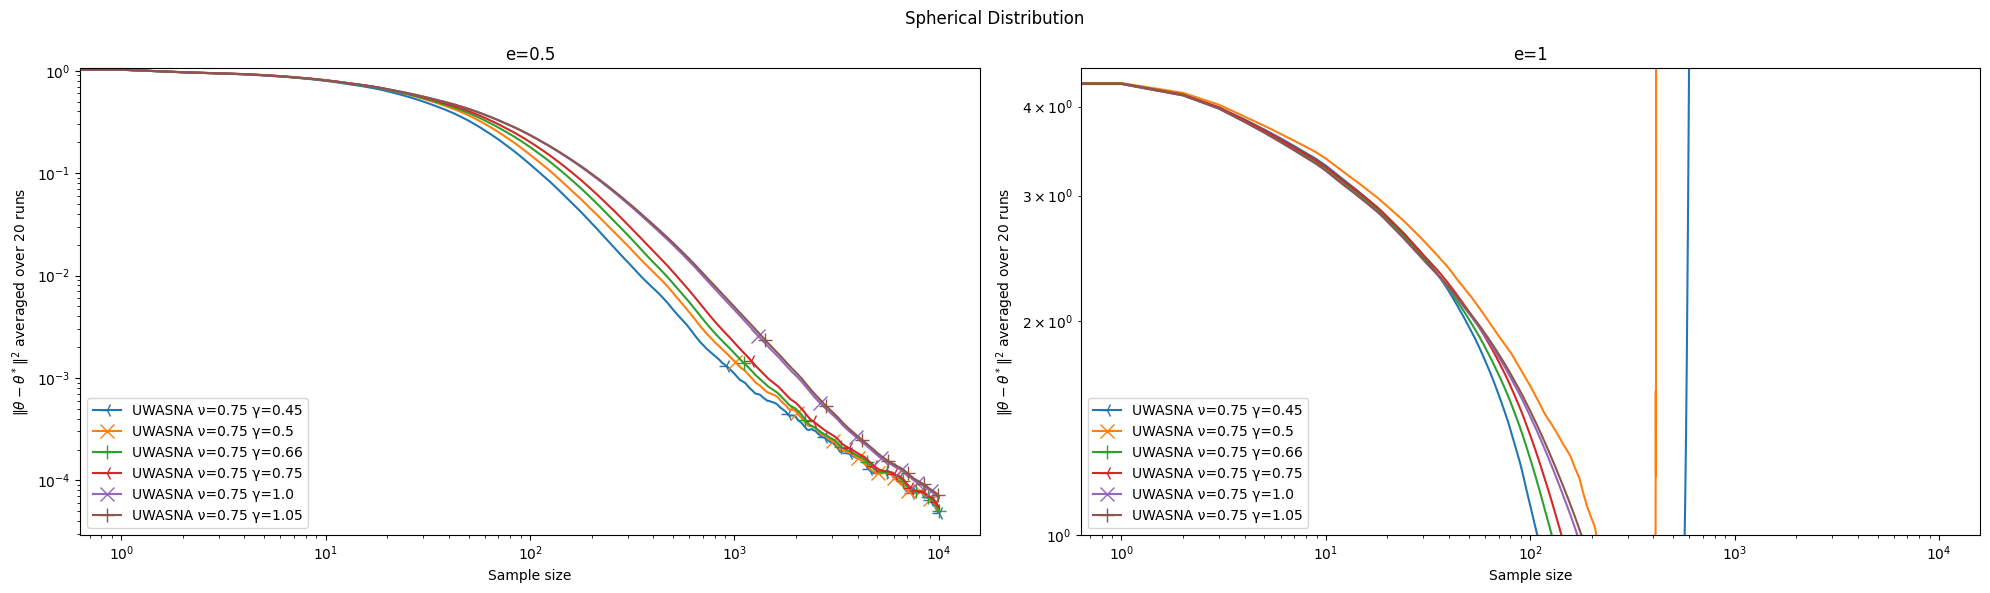

In [5]:
simulation = simulation_spherical_distribution(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

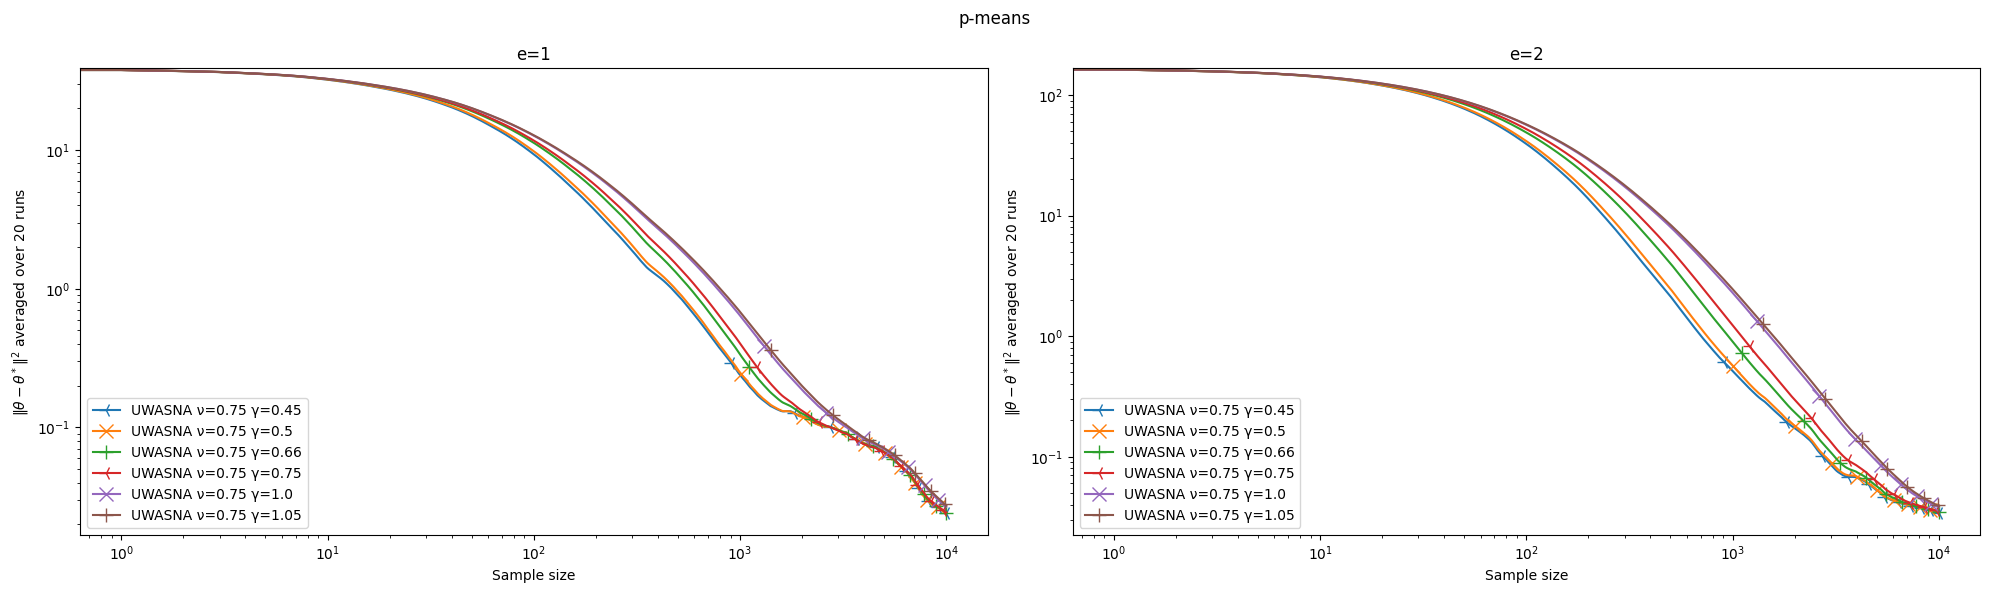

In [6]:
simulation = simulation_p_means(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

In [7]:
eval = eval_covtype(optimizer_list=optimizer_list)
_, _ = eval.run()

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/464809 [00:00<?, ?it/s]

,UWASNA ν=0.75 γ=0.45,UWASNA ν=0.75 γ=0.5,UWASNA ν=0.75 γ=0.66,UWASNA ν=0.75 γ=0.75,UWASNA ν=0.75 γ=1.0,UWASNA ν=0.75 γ=1.05
Training Accuracy,72.340000,72.350000,72.580000,72.810000,73.150000,62.570000
Test Accuracy,72.530000,72.520000,72.730000,72.960000,73.370000,62.460000
